# Showing examples of Resnet-34 predictions

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
%matplotlib inline

from IPython.display import display

In [5]:
PATH = os.path.abspath('../..')

# Load predictions

## Load data

In [6]:
# load in all products
preds = pd.read_csv(f'{PATH}/catalogs/predictions-oh_p50.csv', index_col=0)
inds = preds.index

full_df = pd.read_csv(f'{PATH}/catalogs/SDSSspecgalsDR14_boada.csv', index_col=0)
full_df = full_df.loc[inds].drop_duplicates()

In [8]:
display(preds.head())

,oh_p50,prediction
objID,,
1237658493878337647,8.577997,8.696861
1237665330918850673,8.726439,8.757436
1237657630582178125,8.948060,9.024221
1237651250411405534,8.894798,9.015285
1237674651536261211,8.333275,8.544479


## Image loading function

In [101]:
def load_image(idx, df, ax=None, annotate=True):
    """Helper function to load and annotate image"""
    
    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        
    Z_true, Z_pred = df.iloc[idx]
    name = df.index[idx]
    
    # get image
    image = plt.imread(f'{PATH}/test/{name}.jpg')
    ax.imshow(image)
    ax.axis('off')
    
    # label
    if annotate:
        fontdict = dict(color='white', size=18)
        ax.text(0.5, 0.9, f'{name}', fontdict=fontdict, transform=ax.transAxes, ha='center', va='bottom')
        ax.text(0.05, 0.125, r'$Z_{\rm true}$' + f' = {Z_true:.3f}', fontdict=fontdict, transform=ax.transAxes, ha='left', va='bottom')
        ax.text(0.05, 0.025, r'$Z_{\rm pred}$' + f' = {Z_pred:.3f}', fontdict=fontdict, transform=ax.transAxes, ha='left', va='bottom')

Example of this in action:

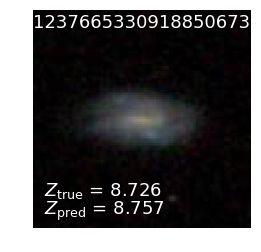

In [102]:
load_image(1, preds)

# Plot extremal predictions

## Lowest metallcities

In [62]:
lowest_Z = preds.sort_values(by='prediction', ascending=True)

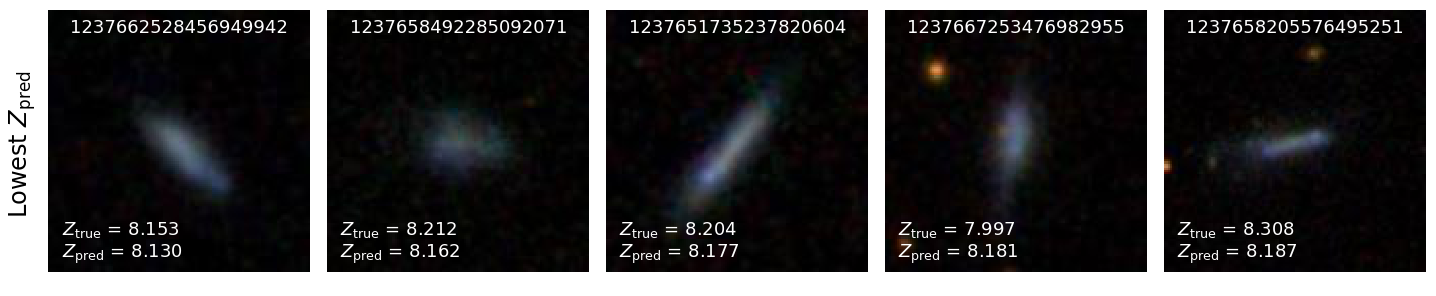

In [103]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, lowest_Z, ax=ax)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)
fig.text(0, 0.5, r'Lowest $Z_{\rm pred}$', rotation=90, fontsize=24, va='center');

## Highest Metallicities

In [82]:
highest_Z = preds.sort_values(by='prediction', ascending=False)

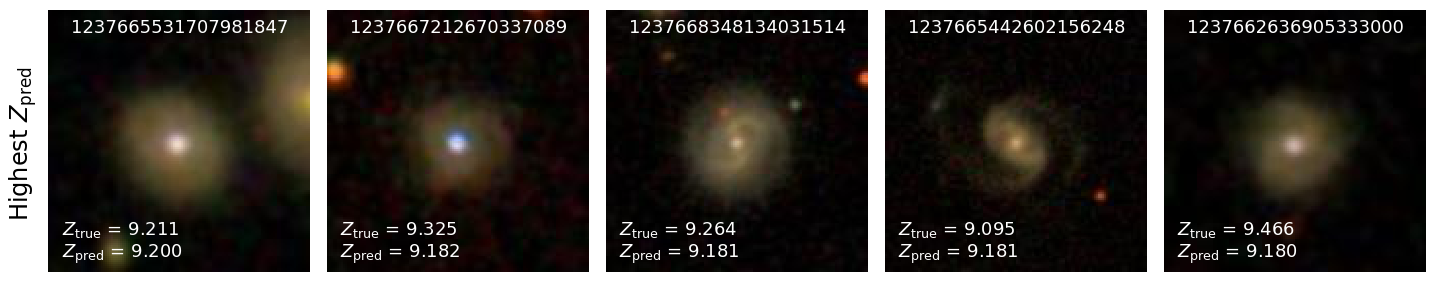

In [104]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, highest_Z, ax=ax)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)
fig.text(0, 0.5, r'Highest $Z_{\rm pred}$', rotation=90, fontsize=24, va='center');

## Most underestimated

In [100]:
underestimated = preds.iloc[np.argsort(preds.prediction - preds.oh_p50)]
underestimated.head()

,oh_p50,prediction
objID,,
1237671990806577234,9.404537,8.915990
1237658423019241540,9.336292,8.888089
1237651211215438014,8.932167,8.495298
1237661811735592962,9.290234,8.859110
1237662301374513420,8.870122,8.456147


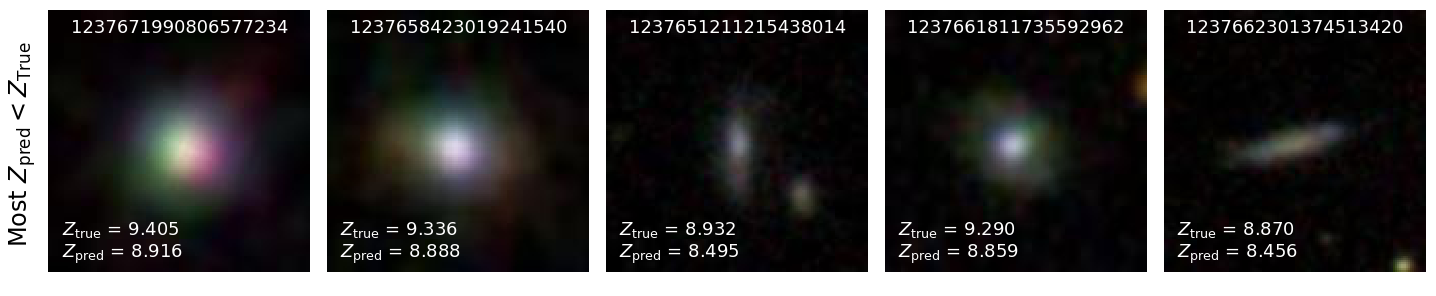

In [117]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, underestimated, ax=ax)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)
fig.text(0, 0.5, r'Most $Z_{\rm pred} < Z_{\rm True}$', rotation=90, fontsize=24, va='center');

## Most overestimated

In [110]:
overestimated = preds.iloc[np.argsort(preds.oh_p50 - preds.prediction)]
overestimated.head()

,oh_p50,prediction
objID,,
1237667781740855516,8.248375,9.102613
1237648702974460079,8.363327,9.056627
1237667911664402563,8.311904,8.994802
1237651496296382666,8.009755,8.647078
1237665329318461522,8.293189,8.926647


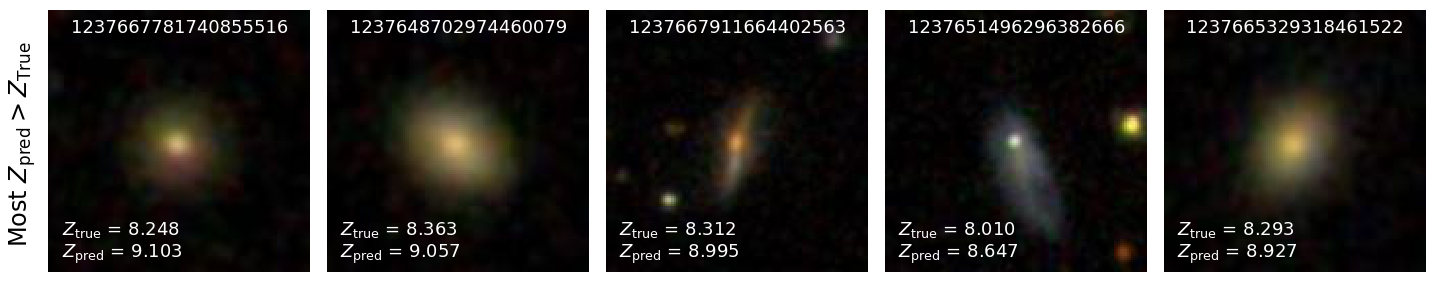

In [112]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, overestimated, ax=ax)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)
fig.text(0, 0.5, r'Most $Z_{\rm pred} > Z_{\rm True}$', rotation=90, fontsize=24, va='center');

## Random choice

In [132]:
rand = preds.sample(frac=1)

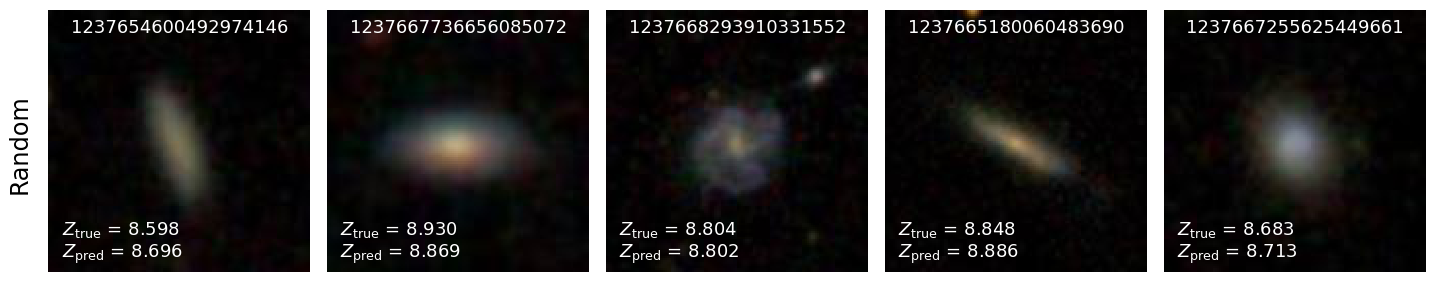

In [137]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, rand, ax=ax)
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03)
fig.text(0, 0.5, r'Random', rotation=90, fontsize=24, va='center');

# Final figure

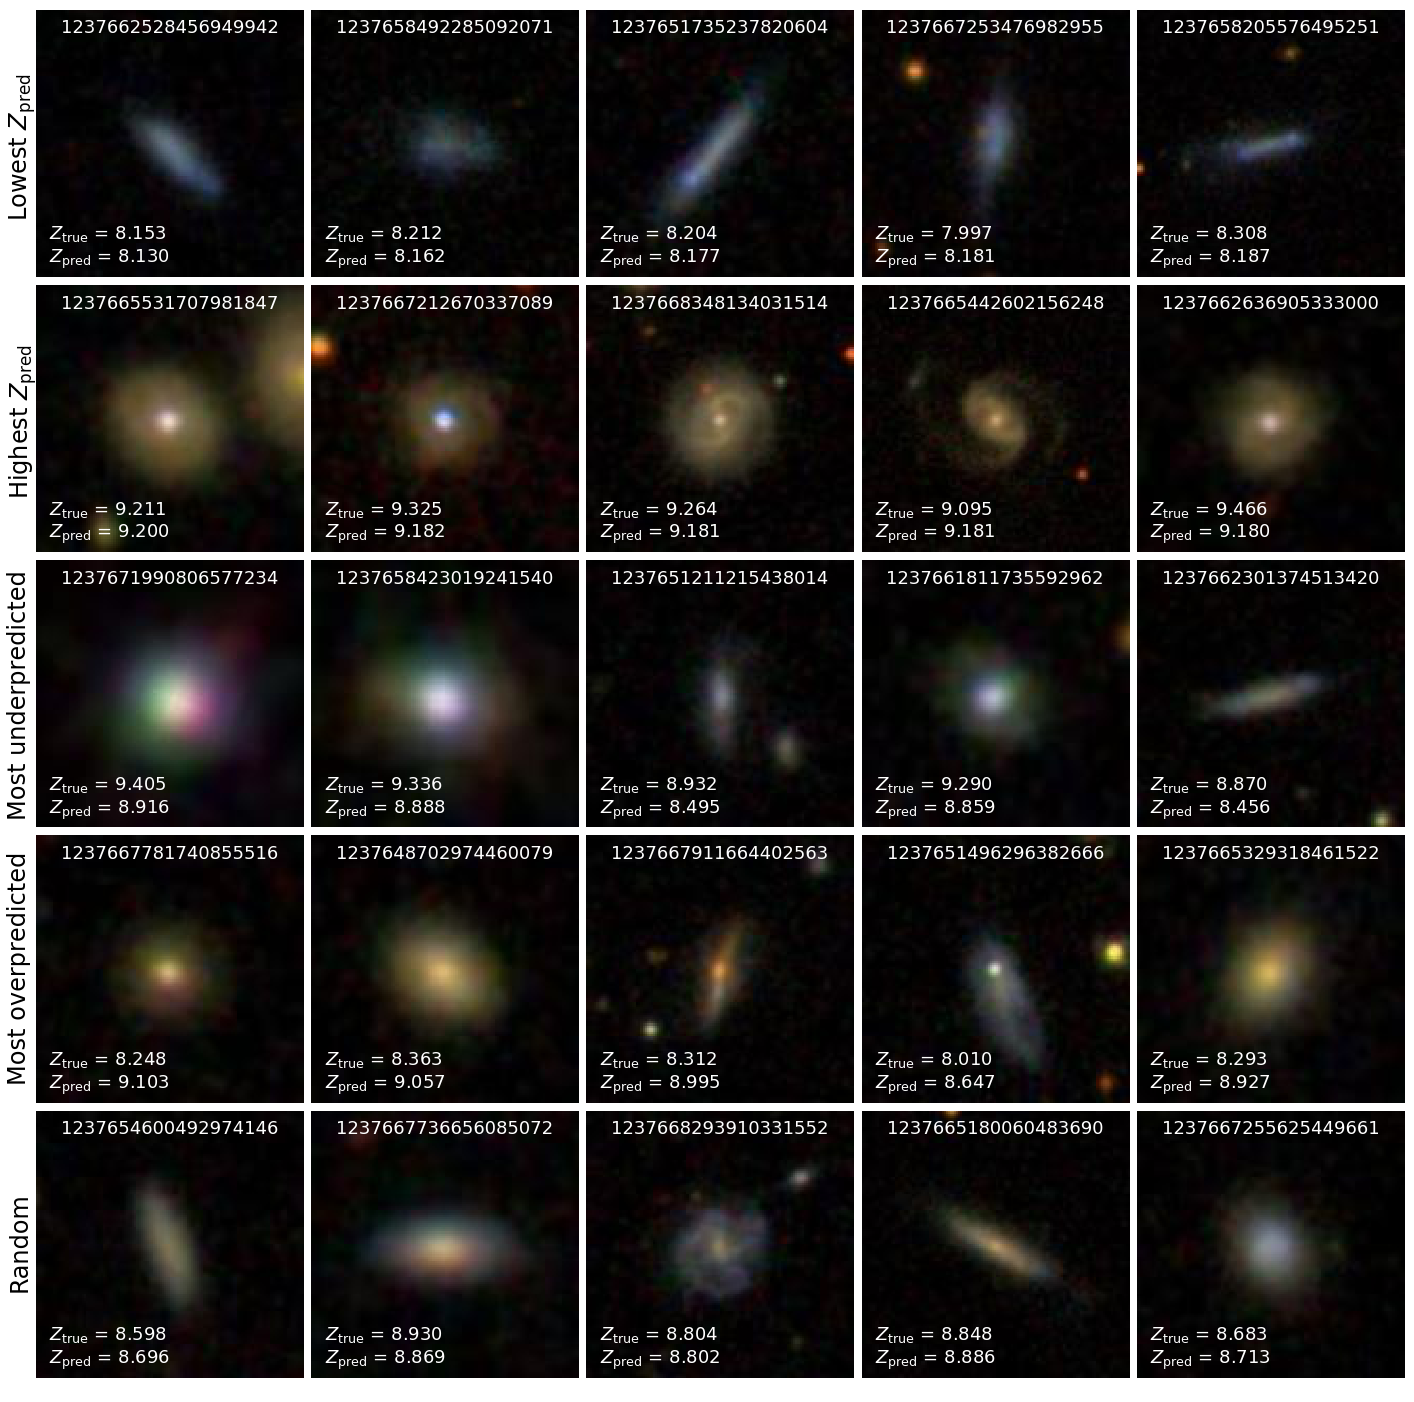

In [145]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for idx in range(5):
    ax = axes.flat[idx]
    load_image(idx, lowest_Z, ax=ax)
fig.text(0.02, 0.88, r'Lowest $Z_{\rm pred}$', rotation=90, fontsize=24, va='center');

for idx in range(5):
    ax = axes.flat[5+idx]
    load_image(idx, highest_Z, ax=ax)
fig.text(0.02, 0.69, r'Highest $Z_{\rm pred}$', rotation=90, fontsize=24, va='center');

for idx in range(5):
    ax = axes.flat[10+idx]
    load_image(idx, underestimated, ax=ax)
fig.text(0.02, 0.5, r'Most underpredicted', rotation=90, fontsize=24, va='center');

for idx in range(5):
    ax = axes.flat[15+idx]
    load_image(idx, overestimated, ax=ax)
fig.text(0.02, 0.31, r'Most overpredicted', rotation=90, fontsize=24, va='center');

for idx in range(5):
    ax = axes.flat[20+idx]
    load_image(idx, rand, ax=ax)
fig.text(0.02, 0.12, r'Random', rotation=90, fontsize=24, va='center');

fig.tight_layout()
fig.subplots_adjust(wspace=0.03, hspace=0.03, left=0.04, right=0.99, bottom=0.025, top=0.975)

# save figure
fig.savefig(f'{PATH}/results/01-prediction_examples.pdf')